In [2]:
import pandas as pd
Df = pd.read_pickle('df.pkl')
print(Df.shape)
Df.head()

(19, 743)


,ID,Pfade,NeueSpalte_2,NeueSpalte_3,NeueSpalte_4,NeueSpalte_5,NeueSpalte_6,NeueSpalte_7,NeueSpalte_8,NeueSpalte_9,...,NeueSpalte_733,NeueSpalte_734,NeueSpalte_735,NeueSpalte_736,NeueSpalte_737,NeueSpalte_738,NeueSpalte_739,NeueSpalte_740,NeueSpalte_741,NeueSpalte_742
0,f_100307,/Users/leoschild/Desktop/LEO/RSDS.nosync/Vorb_...,0.842616,0.281377,0.145945,0.143361,0.136568,0.125769,-0.153299,0.489867,...,0.528217,0.552261,0.080016,-0.099528,0.550423,0.198592,-0.022323,0.080028,-0.165354,0.500013
1,f_105014,/Users/leoschild/Desktop/LEO/RSDS.nosync/Vorb_...,0.801185,0.31438,0.005703,0.028383,0.032578,0.170047,-0.149016,0.647706,...,0.601232,0.630362,0.452356,0.319196,0.559091,0.487466,0.36968,0.359345,0.286999,0.631849
2,f_117122,/Users/leoschild/Desktop/LEO/RSDS.nosync/Vorb_...,0.909063,0.475049,0.267137,0.418913,0.333262,0.318331,0.457528,0.611297,...,0.522906,0.701851,0.324999,0.246327,0.569567,0.335609,0.452695,0.362368,0.345511,0.751584
3,f_118528,/Users/leoschild/Desktop/LEO/RSDS.nosync/Vorb_...,0.766762,0.197657,-0.008234,0.113065,0.098727,0.078905,-0.147879,0.674439,...,0.533029,0.652959,0.305309,0.189316,0.50307,0.45867,0.465517,0.24414,0.168589,0.671725
4,f_128127,/Users/leoschild/Desktop/LEO/RSDS.nosync/Vorb_...,0.774523,0.072471,0.152157,0.137245,0.129428,0.082874,0.167083,0.500557,...,0.69342,0.685404,0.451762,0.499827,0.66331,0.386001,0.435546,0.568302,0.635042,0.757881


In [3]:
Df.pop('Pfade') # removing Pfade from the dataframe
label = Df.pop('ID') # removing and saving ID from the dataframe into label 
Dataset = Df.values # converting the dataframe into numpy array

In [4]:
import numpy as np
import scipy.stats as stats

# the variable 'Dataset' contains the 2D array (10, 741)
P_value = np.empty(Dataset.shape[1]*2).reshape(741,2) # creating an array of zeros with the same length as the number of rows in the dataset
count = 0
for columns in Dataset.T:
    # Perform operations on each column
    diff = np.round((columns[:14]-columns[5:]).tolist(), 19) # subtracting the first five elements from the last five elements of the column
    P_value[count,:] = stats.wilcoxon(diff, alternative= "two-sided") # comparing the man and woman samples for every feature of the dataset
    count += 1 

In [5]:
(P_value[:,1]<0.05).sum()

6

In [10]:
print(P_value)
print(P_value.shape)

[[44.          0.62573242]
 [44.          0.62573242]
 [50.          0.90319824]
 ...
 [38.          0.39099121]
 [33.          0.24121094]
 [38.          0.39099121]]
(741, 2)


In [6]:
p_value_fdr = stats.false_discovery_control(P_value[:,1], method='bh')

In [7]:
(p_value_fdr < 0.7).sum()

0

In [8]:
print(p_value_fdr)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [9]:
from sklearn.manifold import TSNE

X_embedded= TSNE(n_components=2, random_state=0, perplexity=5).fit_transform(Dataset)

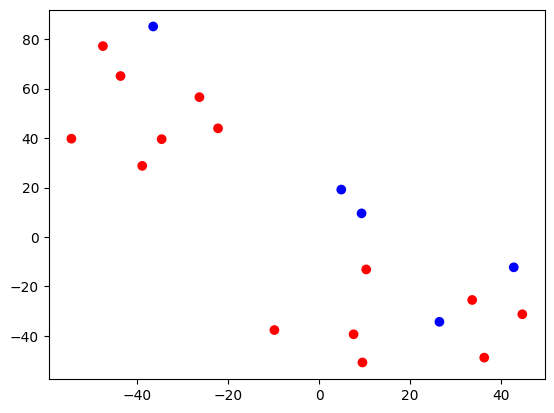

In [11]:
from matplotlib import pyplot as plt
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = ['r', 'r', 'r', 'r', 'r','r', 'r', 'r', 'r', 'r','r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b'])